**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial para Robótica Móvel – CT-213**

**Professores:** 

Marcos Ricardo Omena de Albuquerque Maximo

André Oliveira Françani


# Laboratório 5 – Estratégias Evolutivas

# 1.	Introdução
 
Nesse laboratório, seu objetivo é implementar uma estratégia evolutiva simples e comparar seu desempenho com o CMA-ES em funções usadas como benchmark para algoritmos de otimização. A Figura 1 ilustra uma estratégia evolutiva sendo aplicada para otimizar a função de Rastrigin.

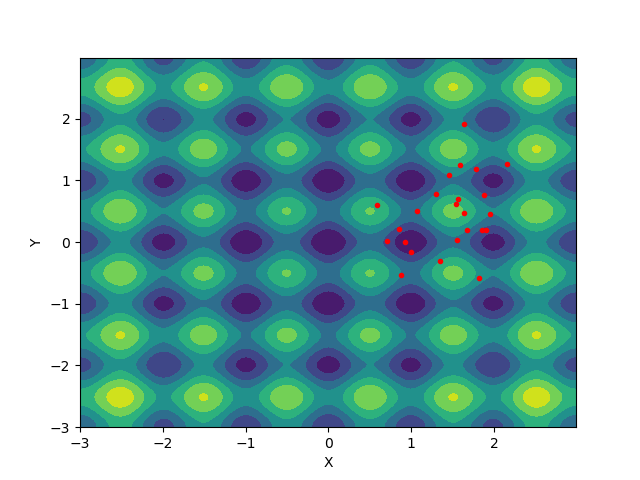

**Figura 1**:  otimização da função de Rastrigin usando estratégia evolutiva. As amostras são os pontos vermelhos.


# 2. Descrição do Problema

O problema a ser resolvido é a otimização de funções benchmark através de estratégias evolutivas. A saber, as seguintes funções serão usadas:

- **Translated Sphere (com centro em (1,2))** - *translated_sphere*:

$$f(x_1, x_2) = (x_1 -1)^2 + (x_2 - 2)^2 $$

- **Ackley** - *ackley*:

$$f(x_1, x_2) = -20 \exp{\left(-0.2 \sqrt{-0.5 \left(x_1^2 + x_2^2 \right)}\right)} - 
\exp{\left(0.5(\cos{(2\pi x_1 + 2 \pi x_2)}\right)} + \exp(1) + 20$$


- **Schaffer function N. 2** - *schaffer2d*:

$$f(x_1, x_2) = 0.5 + \frac{\sin^2 \left(x_1^2 - x_2^2 \right) - 0.5}{1 + 0.001 \left( x_1^2 + x_2^2\right)^2}$$

- **Rastrigin (2D)** - *rastrigin*:

$$f(x_1, x_2) = 2A + \sum_{i=1}^2 \left(x_i^2 - A \cos(2 \pi x_i) \right),$$ em que $A = 10$.

A estratégia evolutiva que será implementada é bem simples e evolui a média e covariância de uma distribuição gaussiana através das seguintes equações:

$$m^{(g+1)} = \frac{1}{\mu} \sum_{i=1}^{\mu} s_{i:\lambda}^{(g+1)}$$

$$C^{(g+1)} = \frac{1}{\mu} \sum_{i=1}^{\mu} \left( s^{(g+1)}_{i:\lambda} - m^{(g)}\right) \left( s^{(g+1)}_{i:\lambda} - m^{(g)}\right)^{T}$$


em que $m^{(g+1)}$ e $C^{(g+1)}$ são a média e a covariância da distribuição gaussiana na geração $g+1$, $s_{i:\lambda}^{(g+1)}$ é $i$-ésima melhor amostra (de um total de $\lambda$ amostras em cada geração) e as $\mu$ melhores amostras são escolhidas para evoluir a distribuição gaussiana para a próxima geração. 
Perceba que $m^{(g+1)}$ e $s_{i:\lambda}^{(g+1)}$ são vetores, enquanto $C^{(g+1)}$ é uma matriz.

Então, será realizado um *benchmark* através de simulações de Monte Carlo para comparar os desempenhos dessa estratégia evolutiva simples (SES - *Simple Evolution Strategy*) e do CMA-ES.


# 3. Código Base

O código base já implementa teste e *benchmark* das estratégias evolutivas. A impementação das funções de *benchmark* se encontra no arquivo benchmark.py, que será baixado na célula seguinte. Além disso, o teste de *benchmark* usa a implementação oficial do CMA-ES na comparação.

O foco da sua implementação nesse laboratório é apenas o método ``tell()`` da classe *SimpleEvolutionStrategy*. Perceba que embora a classe *SimpleEvolutionStrategy* tente seguir mais ou menos a interface da implementação oficial do CMA-ES, fez-se algumas modificações, de modo a deixar a implementação mais didática e mais simples quando se usa os recursos do NumPy.

# 4. Tarefas

Comece rodando a célula abaixo para instalar o pacote *cma* e fazer o download do arquivo *benchmark.py* com a implementação das funções de *benchmark*.

In [1]:
import zipfile
import os

# install packages
!pip install cma

# download data (MUST RUN)
!gdown --id 1i1XBi7UwBmwJ5m7Gsh-IObxeH4sr2Xtx

with zipfile.ZipFile("lab5_ct213_2022.zip","r") as zip_ref:
  zip_ref.extractall() # extracts in current directory

# make results folder to save images
if not os.path.exists('results'):
  os.makedirs('results')
  
os.remove("lab5_ct213_2022.zip")

C:\Users\vinic\anaconda3\envs\ct213\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1i1XBi7UwBmwJ5m7Gsh-IObxeH4sr2Xtx
To: c:\Users\vinic\OneDrive\Documentos\CT-213\LAB5\lab5_ct213_2022.zip

  0%|          | 0.00/633 [00:00<?, ?B/s]
100%|██████████| 633/633 [00:00<?, ?B/s] 


## 4.1.	Implementação da Estratégia Evolutiva Simples

Sua primeira tarefa consiste em implementar e testar a estratégia evolutiva simples (SES). Para isso, basta implementar o método ``tell()`` da classe *SimpleEvolutionStrategy*. Uma otimização usando um objeto dessa classe segue o seguinte pseudocódigo:

``` python
for i in range(num_iterations):
   samples = es.ask()
   for j in range(np.size(samples, 0)):
      fitnesses[j] = function(samples[j, :])
   es.tell(fitnesses)
```


$\color{red}{\textbf{Implemente aqui o método tell():}}$

In [2]:
import numpy as np


class SimpleEvolutionStrategy:
    """
    Represents a simple evolution strategy optimization algorithm.
    The mean and covariance of a gaussian distribution are evolved at each generation.
    """
    def __init__(self, m0, C0, mu, population_size):
        """
        Constructs the simple evolution strategy algorithm.

        :param m0: initial mean of the gaussian distribution.
        :type m0: numpy array of floats.
        :param C0: initial covariance of the gaussian distribution.
        :type C0: numpy matrix of floats.
        :param mu: number of parents used to evolve the distribution.
        :type mu: int.
        :param population_size: number of samples at each generation.
        :type population_size: int.
        """
        self.m = m0
        self.C = C0
        self.mu = mu
        self.population_size = population_size
        self.samples = np.random.multivariate_normal(self.m, self.C, self.population_size)

    def ask(self):
        """
        Obtains the samples of this generation to be evaluated.
        The returned matrix has dimension (population_size, n), where n is the problem dimension.

        :return: samples to be evaluated.
        :rtype: numpy array of floats.
        """
        return self.samples

    def tell(self, fitnesses):
        """
        Tells the algorithm the evaluated fitnesses. The order of the fitnesses in this array
        must respect the order of the samples.

        :param fitnesses: array containing the value of fitness of each sample.
        :type fitnesses: numpy array of floats.
        """
        indices = np.argsort(fitnesses)
        parents = self.samples[indices[0:self.mu],:]
        self.m = np.mean(parents, axis = 0)
        self.C = np.zeros(self.C.shape)
        for i in range(self.mu):
            u = self.samples[indices[i],:]-self.m
            u = u[np.newaxis]
            ut = u.transpose()
            self.C = self.C + u*ut/self.mu
        self.samples = np.random.multivariate_normal(self.m, self.C, self.population_size)
        
        
        
        
        

## 4.2 Teste das Estratégias Evolutivas


Teste sua implementação usando a célula abaixo. As variáveis que podem ser alteradas nessa célula são as seguintes:

- *algorithm*: escolhe entre o SES (‘*ses*’) e o CMA-ES (‘*cmaes*’). 
  - Obs.: você deve usar uma string com o nome do algoritmo.

- *function*: escolher a função de teste (*translated_sphere*, *ackley*, *schaffer2d* ou *rastrigin*). 
  - Obs.: usa-se “ponteiro de função” aqui.

Por padrão, o script usa o (12,24)-SES, i.e. $\mu=12$ e $\lambda=24$. Além disso, usa-se a estratégia padrão do CMA-ES, que escolhe $\mu=3$ e $\lambda=6$ para problemas 2D.

Como resultado do teste, é mostrada uma animação. Teste os dois algoritmos para as diferentes funções algumas vezes para pegar intuição. No seu relatório, comente de forma sucinta sobre os resultados para cada um dos algoritmos e das funções, principalmente sobre questões como convergência, incluindo sobre convergência para mínimo local. Além disso, o script salva uma figura (arquivo evolution_strategy.png) com o resultado final da otimização. Inclua figuras de um exemplo de execução para cada algoritmo e cada função no seu relatório.


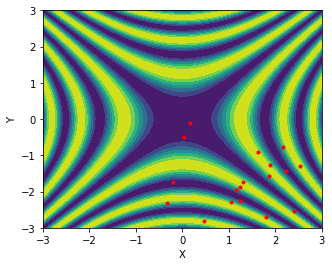

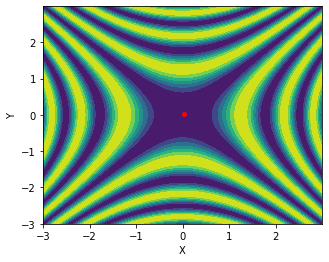

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from benchmark import translated_sphere, ackley, schaffer2d, rastrigin
import cma

# Evolution Strategy algorithm (Simple ES or CMA-ES)
algorithm = 'ses'  # 'ses' or 'cmaes'
# Function which the optimization algorithm will optimize
function =  schaffer2d#ackley, schaffer2d, rastrigin,translated_sphere,
fig_format = 'png'  # 'svg' (Word), 'eps' (Latex), 'png' (best compatibility/worst quality)


def animate(i):
    """
    Updates the optimization progress animation.

    :param i: current iteration.
    """
    plot_x.set_data(history_samples[i][:, 0], history_samples[i][:, 1])


# Simple ES parameters
m0 = np.random.uniform(np.array([-3.0, -3.0]), np.array([3.0, 3.0]))  # initial guess used in the optimization algorithm
C0 = np.identity(2)  # initial covariance (SES)
mu = 12  # number of parents used for computing the mean and covariance of the next generation (SES)
population_size = 24  # population size (SES)
# CMA-ES parameters
sigma0 = 1.0  # initial step size (CMA-ES)

if algorithm == 'ses':
    es = SimpleEvolutionStrategy(m0, C0, mu, population_size)
else:
    es = cma.CMAEvolutionStrategy(m0, 1.0)

num_iterations = 200
history_samples = []  # collect the samples of all iterations
for i in range(num_iterations):
    samples = es.ask()
    # To avoid making the implementation of SES harder, I avoided following
    # the same interface of CMA-ES, thus I need to put an if here.
    if algorithm == 'ses':
        fitnesses = np.zeros(np.size(samples, 0))
        for j in range(np.size(samples, 0)):
            fitnesses[j] = function(samples[j, :])
        es.tell(fitnesses)
        history_samples.append(samples)
    else:
        fitnesses = [function(sample) for sample in samples]
        es.tell(samples, fitnesses)
        # reshaping samples to be a numpy matrix
        reshaped_samples = np.zeros((len(samples), np.size(samples[0])))
        for j in range(len(samples)):
            reshaped_samples[j, :] = samples[j]
        history_samples.append(reshaped_samples)

# Plotting a color map of the function
fig, ax = plt.subplots(figsize=(5, 4))
ax.set(xlim=(-3, 3), ylim=(-3, 3))
x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
[X, Y] = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(np.size(X, 0)):
    for j in range(np.size(X, 1)):
        Z[i, j] = function(np.array([X[i, j], Y[i, j]]))
ax.contourf(X, Y, Z)
# Plotting the samples
num_generations = len(history_samples)
plot_x, = ax.plot(history_samples[0][:, 0], history_samples[0][:, 1], '.r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Making the animation
animation = FuncAnimation(fig, animate, interval=100, frames=num_generations)

# Saving the last generation of the optimization algorithm
plt.figure(figsize=(5,4))
plt.contourf(X, Y, Z)
plt.plot(history_samples[-1][:, 0], history_samples[-1][:, 1], '.r')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('results/evolution_strategy_{}_{}.{}'.format(algorithm, function.__name__, fig_format))

Rode a célula abaixo para visualizar a animação do algoritmo de otimização.

In [4]:
from IPython.display import HTML

# run animation
HTML(animation.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

## 4.3 Benchmark 

Finalmente, faremos um benchmark usando simulações de Monte Carlo para comparar os dois algoritmos. Esse benchmark é realizado ao rodar a célula ``benchmark_evolution_strategy`` já implementada abaixo. Em cada simulação de Monte Carlo, $m^{(0)}$ é amostrado uniformemente num quadrado de lado 6 e centrado em $(0,0)$. Com isso, executa-se uma quantidade considerável de simulações de Monte Carlo para garantir uma convergência adequada dos resultados. As métricas usadas são:
	
1. *Fitness* médio das amostras em cada geração (calcula-se uma média entre todas as simulações de Monte Carlo). Seja $M$ o número de execuções do Monte Carlo, essa métrica é calculada por:

$$f^{(g)}_{mean} = \frac{1}{M} \sum_{k=1}^{M} \sum_{i=1}^{\lambda} f\left(s_i^{(g)}\right)$$


2. Melhor *fitness* entre todas as amostras em cada geração (calcula-se uma média entre todas as simulações de Monte Carlo). Essa métrica é calculada por:

$$f^{(g)}_{best} = \sum_{k=1}^{M} f\left(s_{i:\lambda}^{(g)}\right)$$
    
Portanto, compara-se o desempenho entre:
1. (3,6)-SES: estratégia evolutiva simples com $\mu=3$ e $\lambda=6$.
2. (6,12)-SES: estratégia evolutiva simples com $\mu=6$ e $\lambda=12$.
3. (12,24)-SES: estratégia evolutiva simples com $\mu=12$ e $\lambda=24$.
4. CMA-ES: CMA-ES com estratégia padrão, que usa $\mu=3$ e $\lambda=6$.
	
Na célula ``benchmark_evolution_strategy`` abaixo, tem-se as seguintes variáveis:
- *num_trials*: número de execuções de Monte Carlo.
- *num_iterations*: número de gerações da estratégia evolutiva.
- *function*: função usada para benchmark.

Perceba que como está indicado em comentários no código, recomenda-se usar um número de execuções e de iterações maior para a função Schaffer2D, pois com os valores iniciais os resultados ficam muito ruidosos para essa função. Como isso faz o *benchmark* demorar mais, recomenda-se mudar os valores apenas para essa função.

No final, as métricas de benchmark são plotadas em gráficos. Analise estes gráficos e discuta brevemente no relatório suas conclusões (comente também porque você acha que os resultados são diferentes para cada função). Adicione também os gráficos no seu relatório (que são salvos em arquivos com nomes mean_fitness_function-name.png e best_fitness_function-name.png).


### benchmark_evolution_strategy

CMA-ES: 100%|████████████████████████████████████████████████████████████████████████| 200/200 [00:24<00:00,  8.18it/s]


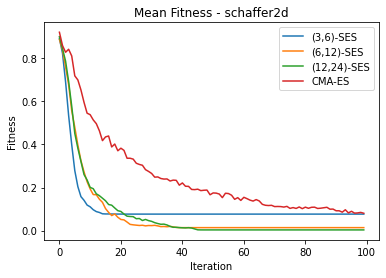

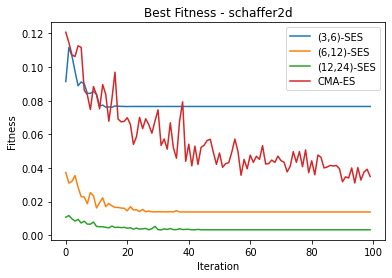

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from benchmark import translated_sphere, ackley, schaffer2d, rastrigin
import cma

# num_trials is the number of trials used in Monte Carlo
# num_iterations is the number of generations the algorithms are executed during a Monte Carlo trial
#num_trials = 500  # recommended for schaffer2d
num_trials = 200  # recommended for all other functions
# num_iterations = 200  # recommended for schaffer2d
num_iterations = 100  # recommended for all other functions
function =  schaffer2d# translated_sphere, ackley, schaffer2d, rastrigin
fig_format = 'png'  # 'svg' (Word), 'eps' (Latex), 'png' (best compatibility/worst quality)


class Params:
    """
    An auxiliary class for storing parameters.
    """
    pass


def benchmark_algorithm(num_trials, num_iterations, algorithm, function, hyperparams):
    """
    Benchmarks an evolution strategy algorithm using Monte Carlo (MC) simulations.

    :param num_trials: number of Monte Carlo runs.
    :type num_trials: int.
    :param num_iterations: number of iterations.
    :type num_iterations: int.
    :param algorithm: evolution strategy algorithm (ses or cmaes).
    :type algorithm: str.
    :param function: function used for benchmarking.
    :type function: function.
    :param hyperparams: hyperparams of the algorithm.
    :type hyperparams: Params.
    :return mean_fitness: array containing the mean fitness of samples at each iteration (averaged over all MC trials).
    :rtype mean_fitness: numpy array of floats.
    :rtype best_fitness: array containing the best fitness of samples at each iteration (averaged over all MC trials).
    :rtype best_fitness: numpy array of floats.
    """
    if algorithm == 'ses':
        benchmark_name = '(%d,%d)-SES' % (hyperparams.mu, hyperparams.population_size)
    else:
        benchmark_name = 'CMA-ES'
    mean_fitness = [0.0] * num_iterations
    best_fitness = [0.0] * num_iterations
    # Printing the benchmarking status for the user
    for k in tqdm(range(num_trials), desc=benchmark_name):
        # Sampling the initial guess using an uniform distribution
        m0 = np.random.uniform(np.random.uniform(hyperparams.lower, hyperparams.upper))
        if algorithm == 'ses':
            C0 = hyperparams.C0
            es = SimpleEvolutionStrategy(m0, C0, hyperparams.mu, hyperparams.population_size)
        else:
            es = cma.CMAEvolutionStrategy(m0, hyperparams.sigma0, {'verb_disp': 0})
        for i in range(num_iterations):
            samples = es.ask()
            if algorithm == 'ses':
                fitnesses = np.zeros(np.size(samples, 0))
                for j in range(np.size(samples, 0)):
                    fitnesses[j] = function(samples[j, :])
                es.tell(fitnesses)
            else:
                fitnesses = [function(sample) for sample in samples]
                es.tell(samples, fitnesses)
            mean_fitness[i] += np.mean(fitnesses)
            best_fitness[i] += np.min(fitnesses)
    for i in range(num_iterations):
        mean_fitness[i] /= num_iterations
        best_fitness[i] /= num_iterations
    return mean_fitness, best_fitness


hyperparams = Params()
# lower and upper are used for sampling the initial guess
hyperparams.lower = np.array([-3.0, -3.0])  # SES and CMA-ES
hyperparams.upper = np.array([3.0, 3.0])  # SES and CMA-ES
hyperparams.C0 = np.identity(2)  # SES only
hyperparams.sigma0 = 1.0  # CMA-ES only

# The default CMA-ES strategy (which is used here) uses mu = 3 and population_size = 6
hyperparams.mu = 3  # SES only
hyperparams.population_size = 6  # SES only
# Benchmarking (3,6)-SES
mean_ses6, best_ses6 = benchmark_algorithm(num_trials, num_iterations, 'ses', function, hyperparams)
hyperparams.mu = 6  # SES only
hyperparams.population_size = 12  # SES only
# Benchmarking (6,12)-SES
mean_ses12, best_ses12 = benchmark_algorithm(num_trials, num_iterations, 'ses', function, hyperparams)
hyperparams.mu = 12  # SES only
hyperparams.population_size = 24  # SES only
# Benchmarking (12,24)-SES
mean_ses24, best_ses24 = benchmark_algorithm(num_trials, num_iterations, 'ses', function, hyperparams)
# Benchmarking (3_w,6)-CMA-ES
mean_cmaes, best_cmaes = benchmark_algorithm(num_trials, num_iterations, 'cmaes', function, hyperparams)
plt.figure()
plt.plot(mean_ses6)
plt.plot(mean_ses12)
plt.plot(mean_ses24)
plt.plot(mean_cmaes)
plt.legend(['(3,6)-SES', '(6,12)-SES', '(12,24)-SES', 'CMA-ES'])
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Mean Fitness - {}'.format(function.__name__))
plt.savefig('results/mean_fitness_{}.{}'.format(function.__name__, fig_format))
plt.figure()
plt.plot(best_ses6)
plt.plot(best_ses12)
plt.plot(best_ses24)
plt.plot(best_cmaes)
plt.legend(['(3,6)-SES', '(6,12)-SES', '(12,24)-SES', 'CMA-ES'])
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Best Fitness - {}'.format(function.__name__))
plt.savefig('results/best_fitness_{}.{}'.format(function.__name__, fig_format))
plt.show()

# 5. Entrega

A entrega consiste do notebook no formato **.ipynb** e de um relatório, submetida através do Google Classroom. Modificações nos arquivos do código base são permitidas, desde que o nome e a interface dos scripts “main” não sejam alterados. A princípio, não há limitação de número de páginas para o relatório, mas pede-se que seja sucinto. O relatório deve conter:

- Breve descrição em alto nível da sua implementação.
- Figuras que comprovem o funcionamento do seu código.

Por limitações do Google Classroom (e por motivo de facilitar a automatização da correção), entregue seu laboratório com todos os arquivos num único arquivo **.zip** (**não** utilize outras tecnologias de compactação de arquivos) com o seguinte padrão de nome: **“<login_email_google_education>_labX.zip”**. Por exemplo, no meu caso, meu login Google Education é **marcos.maximo**, logo eu entregaria o lab 5 como **“marcos.maximo_lab5.zip”**. **Não** crie subpastas para os arquivos da sua entrega, **deixe todos os arquivos na “raiz” do .zip**. Os relatórios devem ser entregues em formato **.pdf**.


# 6. Dicas

- Para usuários do MATLAB, o seguinte link de migração de MATLAB para NumPy é interessante: https://numpy.org/doc/stable/user/numpy-for-matlab-users.html 

- Para criar um vetor de zeros usando NumPy que tenha o mesmo número de elementos que outro vetor, faça:
```
array = np.zeros(np.size(other_array))
```
	
- Operações normais de vetor, como soma, subtração e multiplicação por escalar, funciona como esperado em NumPy:
```
sum = a + b
sub = a - b
mul_scalar = scalar * a
```

- Para amostrar *population_size* amostras de uma gaussiana multivariada com média *m* e covariância *C*, use:
```
x = np.random.multivariate_normal(m, C, population_size)
```
Nesse caso, as amostras ficam numa matriz de dimensão (*population_size*, *n*), em que *n* é a dimensão do problema.

- Para pegar as $\mu$ melhores amostras de um certo vetor, pode-se usar:
```
indices = np.argsort(fitnesses)
best_samples = self.samples[indices[0:mu], :]
```
	
- Para transpor um array em NumPy, é necessário primeiro transformar esse array em array bidimensional usando:
```
array2d = array[np.newaxis]
transpose = array2d.transpose() # ou array2d.T
```

- Na dica anterior, perceba ainda que a matriz será um vetor linha, que é diferente da notação usual usada em matemática, em que os vetores são coluna por padrão.
	
- Se estiver usando PyCharm e estiver tendo problema para execução da animação da otimização, é provavelmente por conta da opção “*Show plots in tool window*” estar ativa. Vá em ``File->Settings``, então em ``Tools->Python Scientific`` e desative ``Show plots in tool window``. Veja a Figura 2.


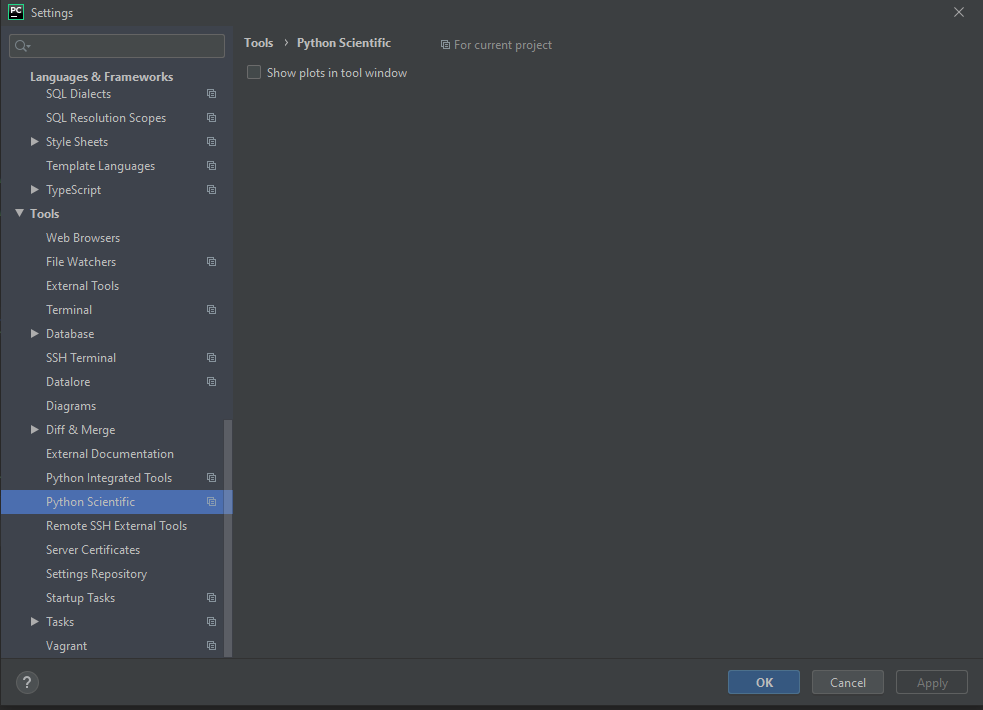

**Figura 2**: configuração da ferramenta “*show plots in tool window*” do PyCharm.

- Para fazer o download do notebook no Colab, vá em ``File > Download >  Download .ipynb``

- Para fazer o download das figuras e usá-las no relatório, use os seguintes comandos:
```python
from google.colab import files
import os
os.system('zip -r lab5_results.zip results')
files.download("lab5_results.zip")
```